In [57]:
import pandas as pd

data = pd.read_csv('recipe_site_traffic_2212.csv')
print(data.head())
print(data.info())
print(data.describe())
print(data.isna().sum())

   recipe  calories  carbohydrate  sugar  protein   category servings  \
0       1       NaN           NaN    NaN      NaN       Pork        6   
1       2     35.48         38.56   0.66     0.92     Potato        4   
2       3    914.28         42.68   3.09     2.88  Breakfast        1   
3       4     97.03         30.56  38.63     0.02  Beverages        4   
4       5     27.05          1.85   0.80     0.53  Beverages        4   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servin

## Data type of servings column is not as described(numeric) ---> convert dtype
## There are null values in calories, carbohydrate, sugar, protein, and high_traffic columns


In [58]:
print(data[data.duplicated()])
data['servings'].unique()

Empty DataFrame
Columns: [recipe, calories, carbohydrate, sugar, protein, category, servings, high_traffic]
Index: []


array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [59]:
data['servings'] = data['servings'].apply(lambda x: x.split()[0])
data['servings'] = data['servings'].astype('int64')
data.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings          int64
high_traffic     object
dtype: object

In [60]:
data['servings'].unique()

array([6, 4, 1, 2], dtype=int64)

### let's check category column, Recipes are listed in one of ten
### possible groupings (Lunch/Snacks', 'Beverages', 'Potato',
### 'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One
### Dish Meal')

In [61]:
data['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [62]:
data = data[data['category'].isin(['Lunch/Snacks', 'Beverages', 'Potato',
 'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal'])]
data['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [63]:
data['high_traffic'].fillna('Low', inplace=True)
data.isna().sum()

C:\Users\SoftLaptop\AppData\Local\Temp\ipykernel_11804\108310560.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['high_traffic'].fillna('Low', inplace=True)


recipe           0
calories        48
carbohydrate    48
sugar           48
protein         48
category         0
servings         0
high_traffic     0
dtype: int64

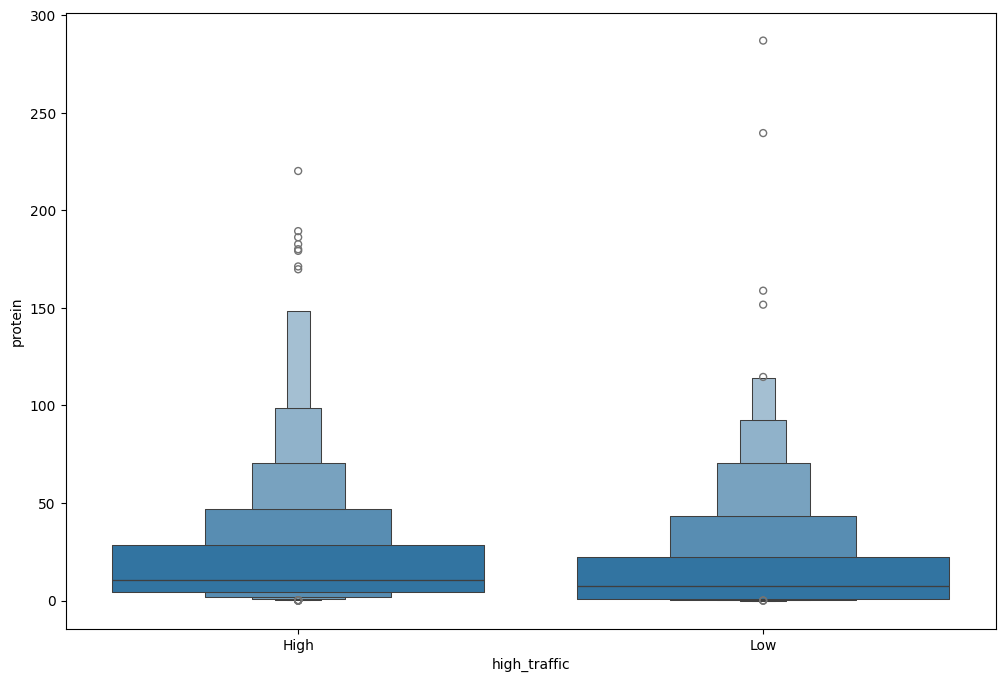

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']

plt.figure(figsize=(12, 8))
sns.boxenplot(y=data['protein'], x=data['high_traffic'])
plt.show()

In [65]:
data.dtypes
# Preprocessing based on exploratory phase  
data['high_traffic'] = data['high_traffic'].astype('category')
data['category'] = data['category'].astype('category')

# Encode Categorical columns
data = pd.get_dummies(data, columns=['category'], drop_first=True)
data['high_traffic'] = data['high_traffic'].map({'High': 1, 'Low': 0})

In [68]:
data['calories'].dtype == 'float64'

True

In [69]:
data.dtypes

recipe                       int64
calories                   float64
carbohydrate               float64
sugar                      float64
protein                    float64
servings                     int64
high_traffic              category
category_Breakfast            bool
category_Chicken              bool
category_Dessert              bool
category_Lunch/Snacks         bool
category_Meat                 bool
category_One Dish Meal        bool
category_Pork                 bool
category_Potato               bool
category_Vegetable            bool
dtype: object